We will try to teach multiplication to a small neural network (just one hidden layer).

In [0]:
import random
import numpy as np

In [2]:
# creating multiplicand, multiplier and product arrays
TEST_SIZE = 10
TRAIN_SIZE = 10000

multiplicand_train = 10 * np.random.rand(1,TRAIN_SIZE)
multiplier_train = 10 * np.random.rand(1,TRAIN_SIZE)
product_train = multiplicand_train * multiplier_train

multiplicand_test = 10 * np.random.rand(1,TEST_SIZE)
multiplier_test = 10 * np.random.rand(1,TEST_SIZE)
product_test = multiplicand_test * multiplier_test

for i in range(3):
  print(f"{multiplicand_test[0][i]} times {multiplier_test[0][i]} equals {product_test[0][i]}")

5.50366351719666 times 4.732794263324159 equals 26.047707121454817
8.949004076590128 times 9.31640425842832 equals 83.37253968783668
3.3598945726200755 times 4.730095500305312 equals 15.892622199450459


In [0]:
import torch

#creating tensors
X1_train = torch.from_numpy(multiplicand_train)
X2_train = torch.from_numpy(multiplier_train)
Y_train = torch.from_numpy(product_train)
X1_test = torch.from_numpy(multiplicand_test)
X2_test = torch.from_numpy(multiplier_test)
Y_test = torch.from_numpy(product_test)

In [6]:
Y_train.shape

torch.Size([1, 10000])

In [14]:
from torch import nn

multiNet = nn.Sequential(nn.Linear(2,100),
                         nn.ReLU(),
                         nn.Linear(100,1),
                         nn.ReLU())

crit = nn.MSELoss()
opt = torch.optim.Adam(multiNet.parameters(), lr=0.002)

epochs = 6
X_train = torch.cat((X1_train, X2_train), 0)
X_train = X_train.float().transpose(0,1)
Y_train = Y_train.float().transpose(0,1)

print(X_train.shape)
print(Y_train.shape)

losses = []

for e in range(epochs):
  running_loss = 0
  i = 0
  for pair in X_train:
    opt.zero_grad()
    output = multiNet(pair)
    loss = crit(output, Y_train[i])
    loss.backward()
    opt.step()
    running_loss += loss.item()
    i += 1
  print(f"Epoch {e}: Training loss: {running_loss/TRAIN_SIZE}")
  losses.append(running_loss/TRAIN_SIZE)

torch.Size([10000, 2])
torch.Size([10000, 1])
Epoch 0: Training loss: 21.728402267179078
Epoch 1: Training loss: 6.574151484518882
Epoch 2: Training loss: 1.9587684036746003
Epoch 3: Training loss: 0.8469378554450541
Epoch 4: Training loss: 0.6123102133068695
Epoch 5: Training loss: 0.49686305002745285


In [16]:
X_test = torch.cat((X1_test, X2_test), 0)
X_test = X_test.float().transpose(0,1)
Y_test = Y_test.float().transpose(1,0)
print(Y_test.shape)

i=0
for pair in X_test:
    out = multiNet(pair)
    print(f"Actual Product: {Y_test[0][i]} Predicted Product: {out.item()}")
    i += 1

torch.Size([1, 10])
Actual Product: 26.047706604003906 Predicted Product: 24.91175651550293
Actual Product: 83.37254333496094 Predicted Product: 83.05851745605469
Actual Product: 15.892621994018555 Predicted Product: 15.934247970581055
Actual Product: 20.44977378845215 Predicted Product: 19.785520553588867
Actual Product: 22.613311767578125 Predicted Product: 22.297576904296875
Actual Product: 83.5197525024414 Predicted Product: 82.44800567626953
Actual Product: 28.531227111816406 Predicted Product: 27.604650497436523
Actual Product: 2.322476625442505 Predicted Product: 2.3064815998077393
Actual Product: 63.026123046875 Predicted Product: 63.277732849121094
Actual Product: 2.175529718399048 Predicted Product: 1.8379185199737549


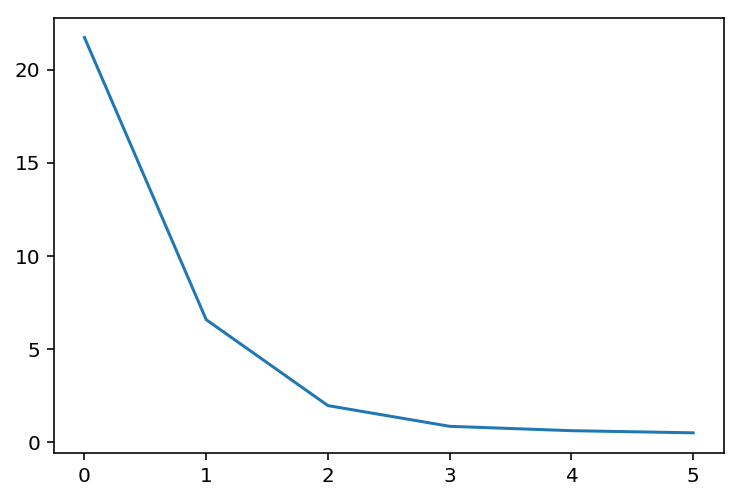

In [17]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

plt.plot(losses, label='Training loss')